## Esmeralda z-effect study

## PHP Correlations

### GD/ JAH   17/10/19

In [1]:
import time
print(time.asctime())

Wed Nov  6 10:09:00 2019


In [2]:
%load_ext autoreload
%autoreload 2

import numpy             as np
import pandas            as pd
import tables            as tb
import matplotlib.pyplot as plt
import utils             as ut

import invisible_cities.core.fit_functions as fitf

to_df = pd.DataFrame.from_records

## Get data

In [3]:
#datadir  = "/home/jrenner/analysis/7431/hdf5/JJ_maps_100_7430_7433/ntuple/trigger2"
#filename = "/ntuple_9040_7431_trigger2_v1.1.0_20190801_bg.h5"

date        = '1030'
type_peak   = 'phpsel'
write       = False
ifile       = f"/home/hernando/ICAROSNB/JAH/esmes/df_7430_7435_{type_peak}_{date}.h5" 
alpha       = 0.05 if type_peak == 'dspsel' else 0.5

In [4]:
print(ifile)
df = pd.read_hdf(ifile, 'esmes')

/home/hernando/ICAROSNB/JAH/esmes/df_7430_7435_phpsel_1030.h5


In [5]:
eref = 1592 if type_peak == 'dspsel' else 2615.
fen, fec, fek, fel = eref/np.mean(df.energy), eref/np.mean(df.ecc), eref/np.mean(df.ecdz), eref/np.mean(df.ecln)
print(fec*np.mean(df.ecc), fek*np.mean(df.ecdz), fel*np.mean(df.ecln))

2615.0 2615.0 2615.0


In [6]:
factor = 1.
df.energy = factor * fen * df.energy
df.ecln   = factor * fel * df.ecln
df.ecc    = factor * fec * df.ecc
df.ecdz   = factor * fek * df.ecdz

In [7]:
df['r_ave'] = np.sqrt(df.x_ave**2 + df.y_ave**2)

In [8]:
dflabels = list(df.columns)
print(dflabels)
print('total events ', len(df))

['event', 'trackID', 'energy', 'length', 'numb_of_voxels', 'numb_of_hits', 'numb_of_tracks', 'x_min', 'y_min', 'z_min', 'x_max', 'y_max', 'z_max', 'r_max', 'x_ave', 'y_ave', 'z_ave', 'extreme1_x', 'extreme1_y', 'extreme1_z', 'extreme2_x', 'extreme2_y', 'extreme2_z', 'blob1_x', 'blob1_y', 'blob1_z', 'blob2_x', 'blob2_y', 'blob2_z', 'eblob1', 'eblob2', 'ovlp_blob_energy', 'vox_size_x', 'vox_size_y', 'vox_size_z', 'time', 'S2e0', 'S2q0', 'S1e', 'ntrks', 'nS2', 'qe0', 'fec', 'dz', 'dx', 'dy', 'zmed', 'ecln', 'dzb', 'adzb', 'dzb1', 'fdzb1', 'dzb2', 'fdzb2', 'brat', 'et1', 'et2', 'fzb', 'ecdz', 'qcdz', 'ei', 'er', 'ee', 'eif', 'slce0', 'slcec0', 'slcz0', 'slcq0', 'slce1', 'slcec1', 'slcz1', 'slcq1', 'slce2', 'slcec2', 'slcz2', 'slcq2', 'slce3', 'slcec3', 'slcz3', 'slcq3', 'slce4', 'slcec4', 'slcz4', 'slcq4', 'slce5', 'slcec5', 'slcz5', 'slcq5', 'slce6', 'slcec6', 'slcz6', 'slcq6', 'b1l', 'b1r', 'ecc', 'qcc', 'r_ave']
total events  624


## general selection

In [9]:
dzmax = 180.

isel = (df.S1e < 1000.) & (df.nS2 == 1) & (df.r_max < 180) & (df.S2q0 > 25000.) & (df.dz < dzmax)
sdf = df[isel]
print('selected events ', len(sdf))

selected events  481


## energy resolution - quick look

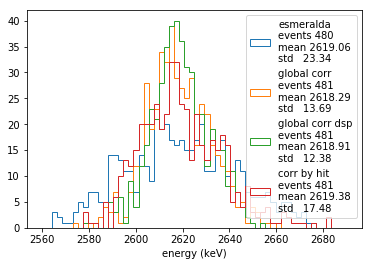

In [10]:
bins = 60
erange = (1600.-57, 1700.-57.) if type_peak is 'dspsel' else (2650.-90, 2780.-90)
ut.hist(sdf.energy.values, bins, erange, fig = True , label = 'esmeralda');
ut.hist(sdf.ecln  .values, bins, erange, fig = False, label = 'global corr' );
ut.hist(sdf.ecdz  .values, bins, erange, fig = False, label = 'global corr dsp');
ut.hist(sdf.ecc   .values, bins, erange, fig = False, label = 'corr by hit');
plt.xlabel('energy (keV)');

energy resolution =   2.25 FWHM
energy resolution =   1.17 FWHM


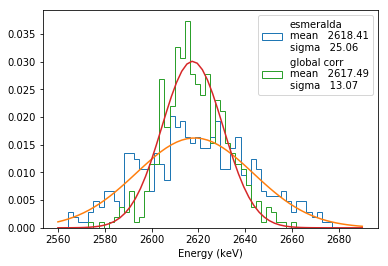

In [11]:
ut.plot_energy_resolution(sdf.energy.values, bins, erange, label = 'esmeralda');
ut.plot_energy_resolution(sdf.ecln  .values, bins, erange, label = 'global corr');
plt.xlabel('Energy (keV)');

energy resolution =   2.25 FWHM
energy resolution =   1.17 FWHM
energy resolution =   1.04 FWHM
energy resolution =   1.48 FWHM


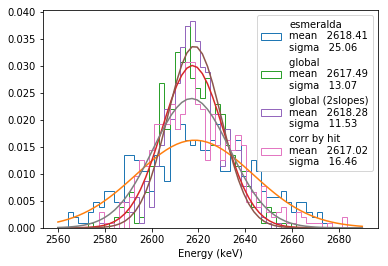

In [12]:
ut.plot_energy_resolution(sdf.energy.values, bins, erange, label = 'esmeralda');
ut.plot_energy_resolution(sdf.ecln  .values, bins, erange, label = 'global ');
ut.plot_energy_resolution(sdf.ecdz  .values, bins, erange, label = 'global (2slopes)' );
ut.plot_energy_resolution(sdf.ecc   .values, bins, erange, label = 'corr by hit');
plt.xlabel('Energy (keV)');

## Fundamental correlations

### E0, E0, Q0

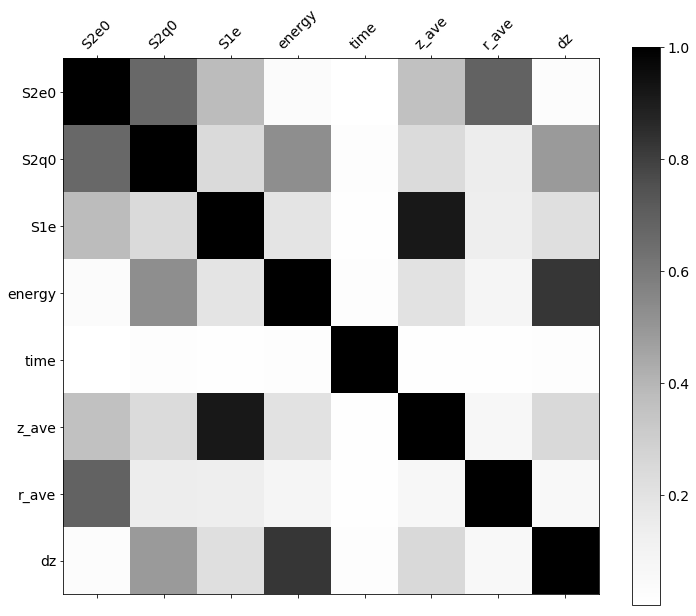

In [13]:
labels = ['S2e0', 'S2q0', 'S1e', 'energy', 'time', 'z_ave', 'r_ave', 'dz'] 
ut.plot_corrmatrix(sdf, labels);
# Todo - write correlation values in the matrix

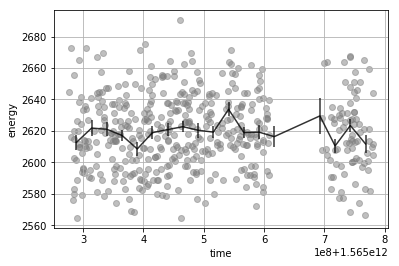

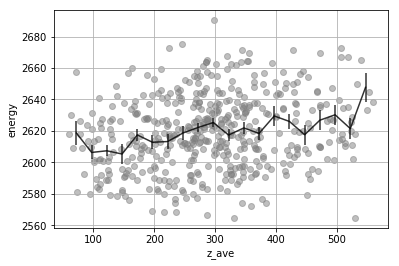

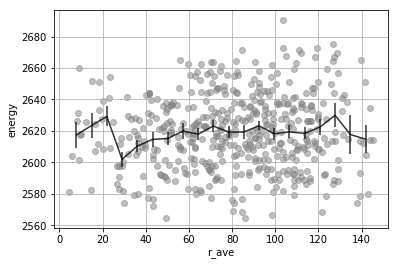

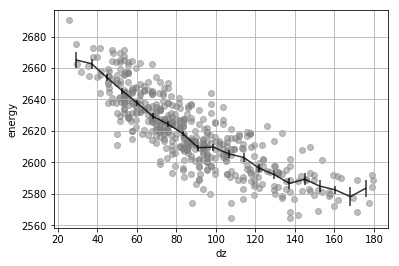

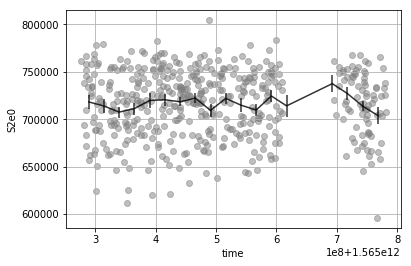

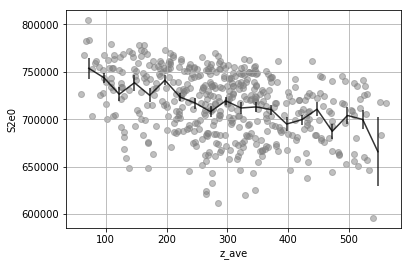

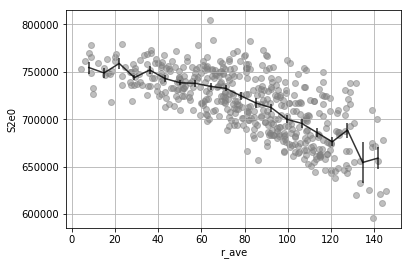

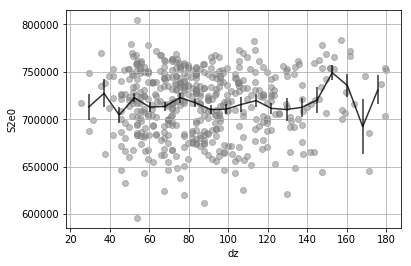

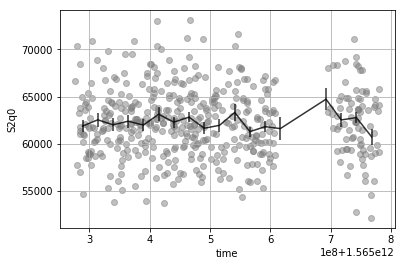

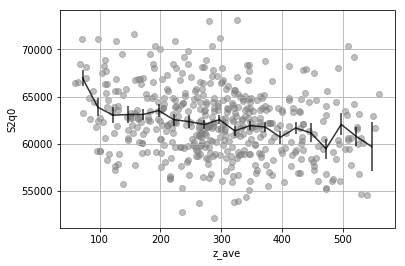

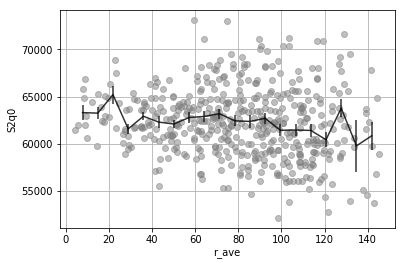

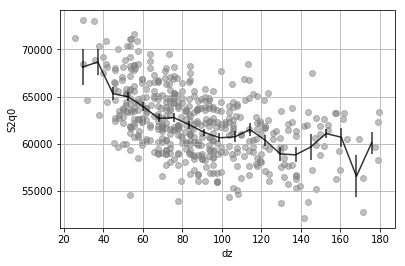

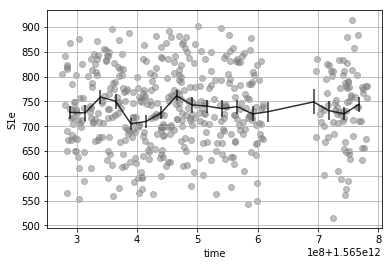

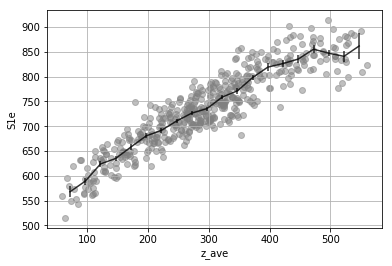

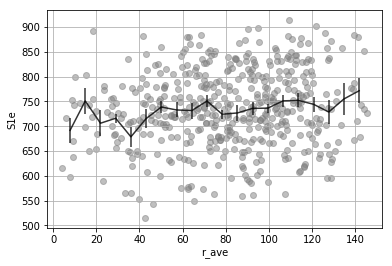

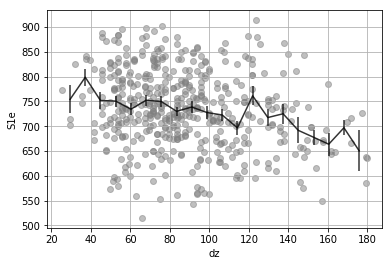

In [14]:
bins = 20
ylabels = ['energy', 'S2e0', 'S2q0', 'S1e']
xlabels = ['time', 'z_ave', 'r_ave', 'dz']
for ylabel in ylabels:
    ut.inspect_corr(ylabel, sdf, xlabels, alpha = alpha, nbins_profile = bins, c = 'grey');

### Ec vs main dependences in %

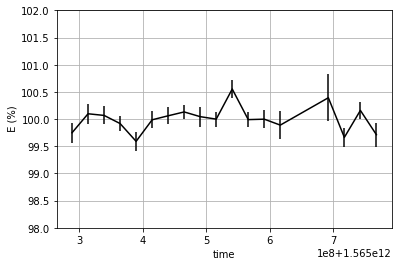

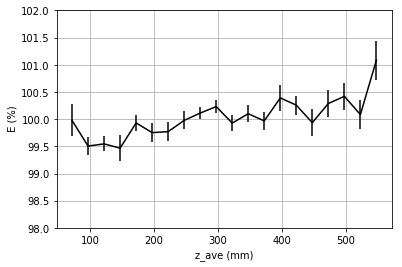

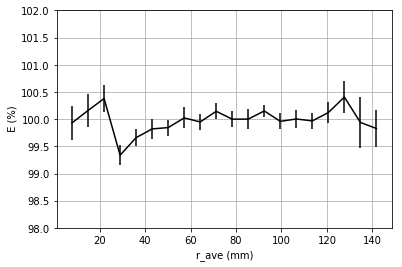

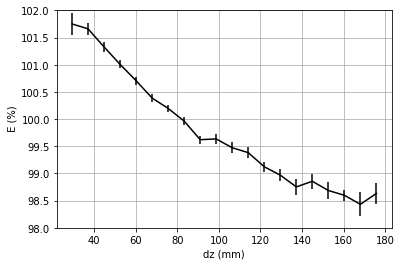

In [15]:
bins = 20
eref = np.mean(sdf.energy)
ut.hprofile(sdf.time, 100.*sdf.energy/eref, nbins_profile = bins, c = 'black');
plt.xlabel('time'); plt.ylabel(' E (%)'); plt.grid(); plt.ylim(98., 102.);
ut.hprofile(sdf.z_ave, 100.*sdf.energy/eref, nbins_profile = bins, c = 'black');
plt.xlabel('z_ave (mm)'); plt.ylabel(' E (%)'); plt.grid(); plt.ylim(98., 102.);
ut.hprofile(sdf.r_ave, 100.*sdf.energy/eref, nbins_profile = bins, c = 'black');
plt.xlabel('r_ave (mm)'); plt.ylabel(' E (%)'); plt.grid(); plt.ylim(98., 102.);
ut.hprofile(sdf.dz, 100.*sdf.energy/eref, nbins_profile = bins, c = 'black');
plt.xlabel('dz (mm)'); plt.ylabel(' E (%)'); plt.grid(); plt.ylim(98., 102.);

### dependence of the Q in %

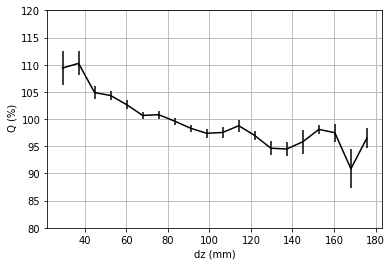

In [16]:
bins = 20
norm = np.mean(sdf.S2q0)
ut.hprofile(sdf.dz, 100.*sdf.S2q0/norm, nbins_profile = bins, c = 'black');
plt.xlabel('dz (mm)'); plt.ylabel(' Q (%)'); plt.grid(); plt.ylim(80., 120.);

### Check that Q0/E0 vs z is flat (same LT dependence)

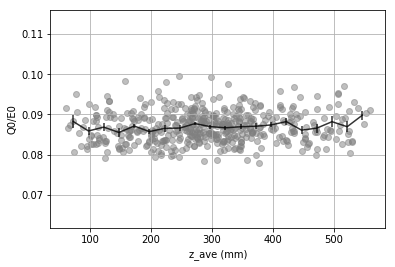

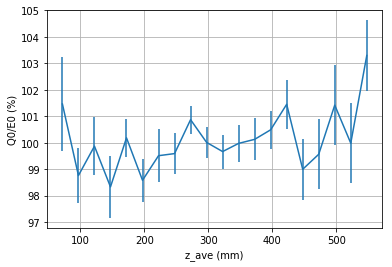

In [17]:
bins = 20
q0e0 = sdf.S2q0.values / sdf.S2e0.values

ut.hpscatter(sdf.z_ave, q0e0, alpha = alpha, nbins_profile = bins, c = 'grey');
plt.xlabel('z_ave (mm)'); plt.ylabel('Q0/E0'); plt.grid()

norm = np.mean(q0e0)
ut.hprofile(sdf.z_ave, 100.*q0e0/norm, nbins_profile = bins);
plt.xlabel('z_ave (mm)'); plt.ylabel('Q0/E0 (%)'); plt.grid();

Text(0.5, 0, 'Q0/E0')

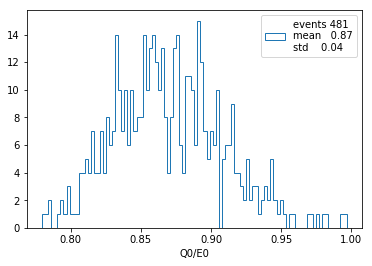

In [18]:
ut.hist(10.*q0e0, 100);
plt.xlabel('Q0/E0')

In [19]:
print('Conversion factor q0/e0 ', 0.086)

Conversion factor q0/e0  0.086


## Estimate dependence energy, Q0 vs dz

### one slope

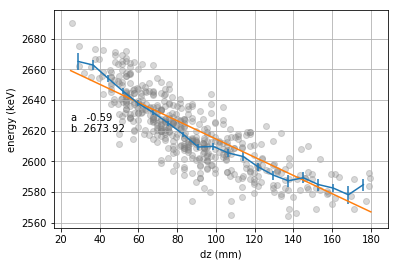

In [20]:
dzrange = (25., 180.);
dz, ene = sdf.dz.values, sdf.energy.values
ut.plot_energy_vs_dz(ene, dz, dzrange = dzrange);
plt.xlabel('dz (mm)')
plt.ylabel('energy (keV)');
plt.scatter(dz, ene, alpha = 0.3, c = 'grey');

### better fit to two slopes

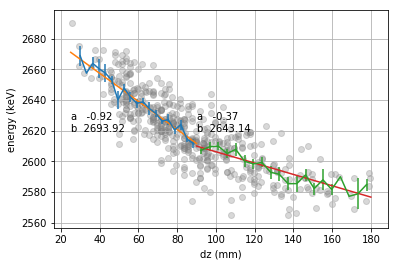

In [21]:
dzrange = (25., 90.);
dz, ene = sdf.dz.values, sdf.energy.values
epars, _ = ut.plot_energy_vs_dz(ene, dz, dzrange = dzrange);
dzrange = (90., 180.);
dz, ene = sdf.dz.values, sdf.energy.values
ut.plot_energy_vs_dz(ene, dz, dzrange = dzrange, fig = False);
plt.xlabel('dz (mm)'); plt.ylabel('energy (keV)'); plt.grid();
plt.scatter(dz, ene, alpha = 0.3, c = 'grey');

### Q0/EE still depends on dz - indicates that the loss in Q0 is larger than in E

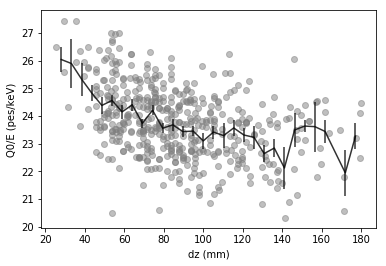

In [22]:
q0ee = sdf.S2q0.values / sdf.energy.values

ut.hpscatter(sdf.dz, q0ee, alpha = alpha, nbins_profile = 30, c = 'grey');
plt.xlabel('dz (mm)'); plt.ylabel('Q0/E (pes/keV)');

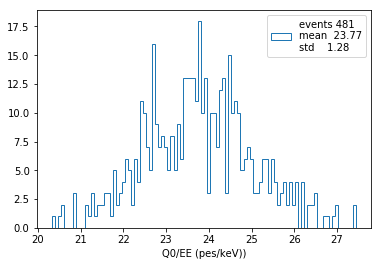

In [23]:
ut.hist(q0ee, 100);
plt.xlabel('Q0/EE (pes/keV))');

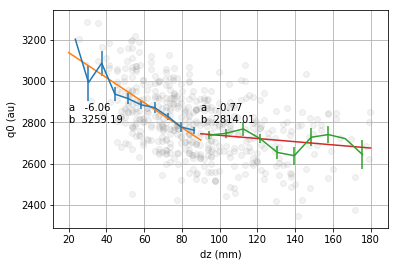

In [24]:
bins = 10
dzrange = (20., 90.);
dz, q0 = sdf.dz.values, sdf.S2q0.values/22.24
qpars, _ = ut.plot_energy_vs_dz(q0, dz, dzrange = dzrange, bins = bins);
dzrange = (90., 180.);
ut.plot_energy_vs_dz(q0, dz, dzrange = dzrange, fig = False, bins = bins);
plt.xlabel('dz (mm)'); plt.ylabel('q0 (au)'); plt.grid();
plt.scatter(dz, q0, alpha = 0.1, c = 'grey');

In [25]:
print('the ratio between slopes is: ', epars[0], qpars[0], qpars[0]/epars[0])

the ratio between slopes is:  -0.9153358583909285 -6.062452968108986 6.623200558062032


## Extender correlations

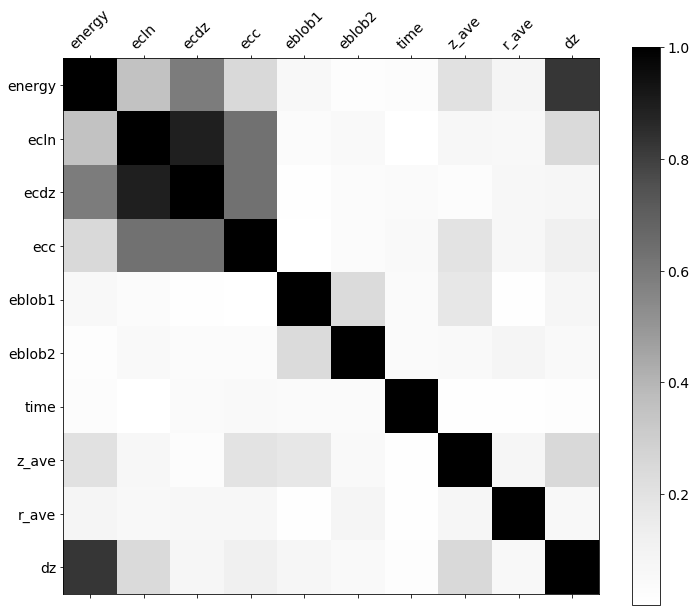

In [26]:
xlabels = ['energy', 'ecln', 'ecdz', 'ecc',  'eblob1', 'eblob2', 
           'time', 'z_ave', 'r_ave', 'dz']
ut.plot_corrmatrix(sdf, xlabels);

/home/hernando/miniconda/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


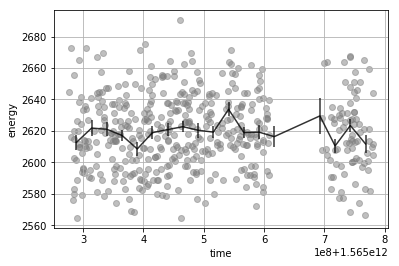

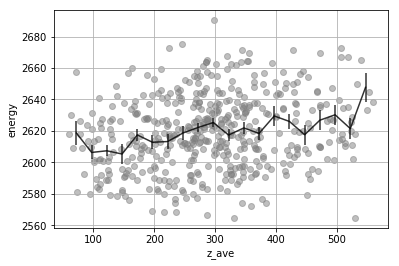

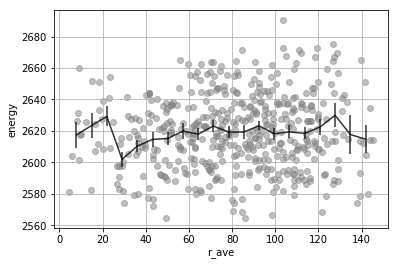

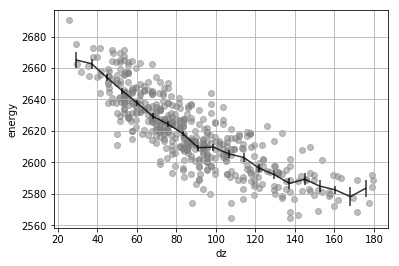

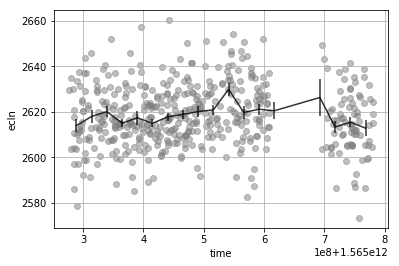

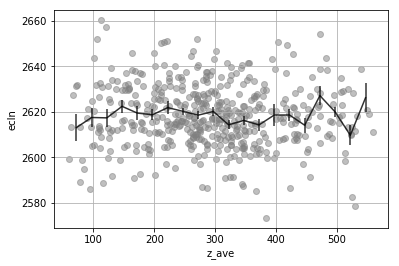

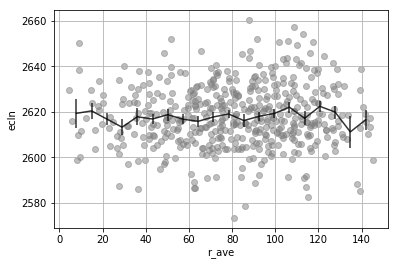

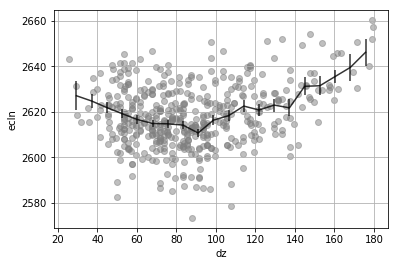

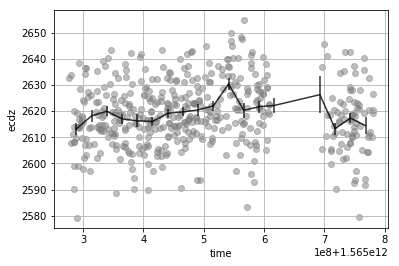

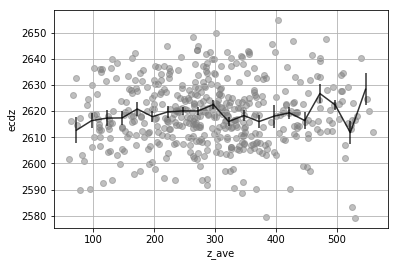

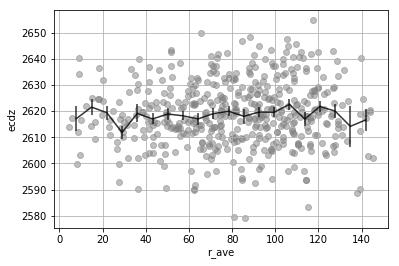

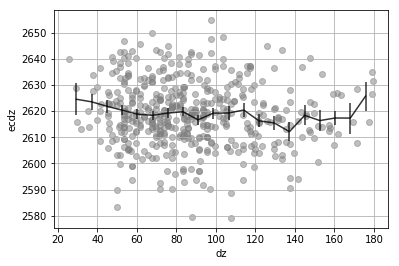

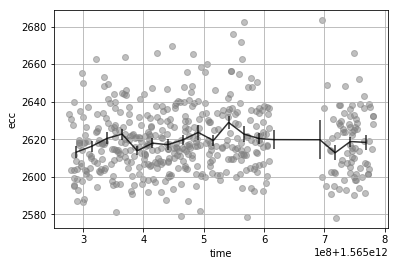

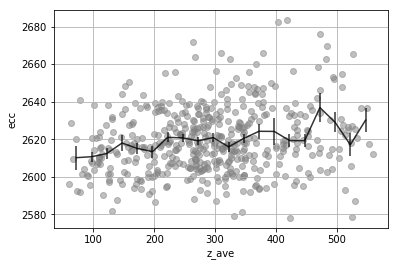

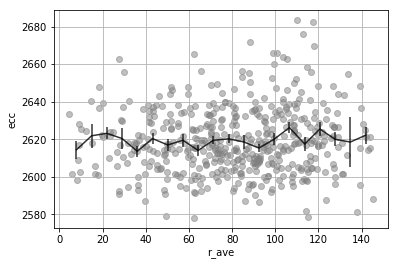

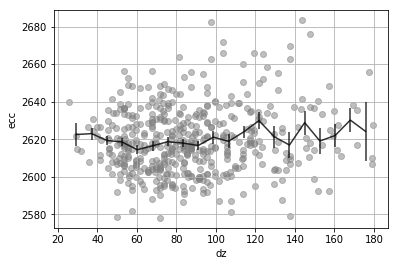

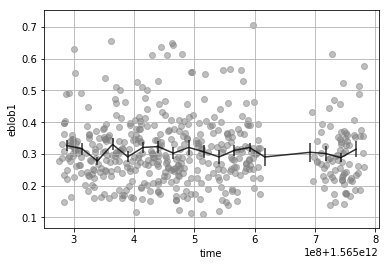

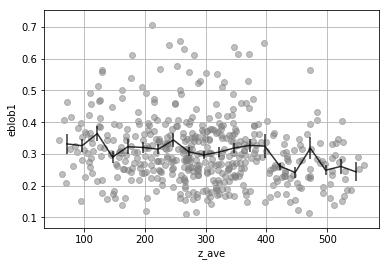

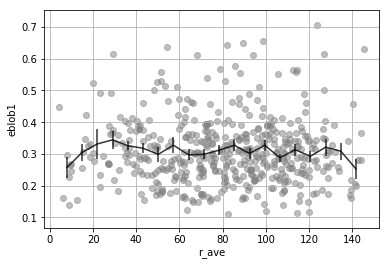

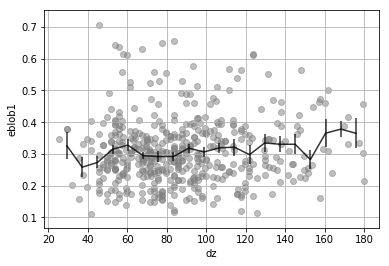

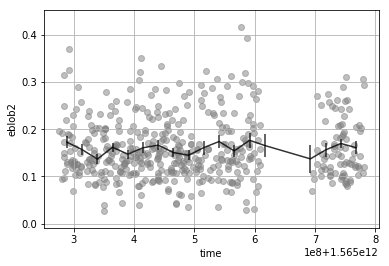

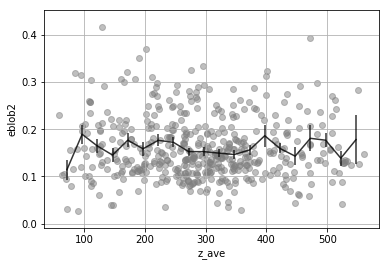

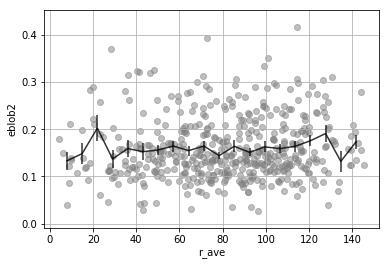

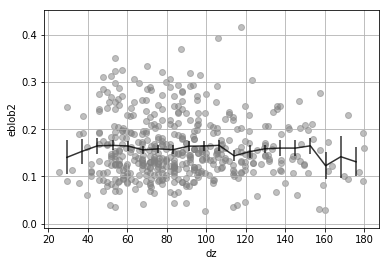

In [27]:
bins = 20
ylabels = ['energy', 'ecln', 'ecdz', 'ecc', 'eblob1', 'eblob2']
xlabels = ['time', 'z_ave', 'r_ave', 'dz']
for ylabel in ylabels:
    ut.inspect_corr(ylabel, sdf, labels = xlabels, reverse = False, 
                    alpha = alpha, nbins_profile = bins, c = 'grey');

### Dependences of E-corrected with dz and z in %

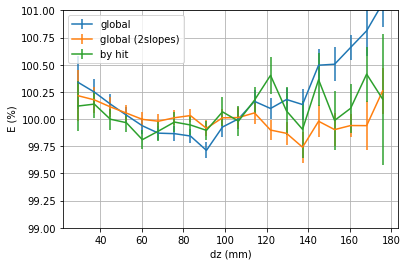

In [28]:
bins = 20
eclnor, ecdznor, eccnor = np.mean(sdf.ecln), np.mean(sdf.ecdz), np.mean(sdf.ecc)
ut.hprofile(sdf.dz, 100.*sdf.ecln/eclnor, nbins_profile = bins, label = 'global');
plt.xlabel('dz (mm)'); plt.ylabel(' E (%)'); plt.grid();
ut.hprofile(sdf.dz, 100.*sdf.ecdz/ecdznor, nbins_profile = bins, label = 'global (2slopes)', fig = False);
plt.xlabel('dz (mm)'); plt.ylabel(' E (%)'); plt.grid();
ut.hprofile(sdf.dz, 100.*sdf.ecc/eccnor, nbins_profile = bins, label = 'by hit', fig = False);
plt.xlabel('dz (mm)'); plt.ylabel(' E (%)'); plt.grid(); plt.ylim(99., 101.); plt.legend();

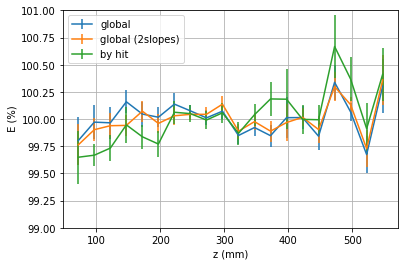

In [29]:
bins = 20
eclnor, ecdznor, eccnor = np.mean(sdf.ecln), np.mean(sdf.ecdz), np.mean(sdf.ecc)
ut.hprofile(sdf.z_ave, 100.*sdf.ecln/eclnor, nbins_profile = bins, label = 'global');
plt.xlabel('z (mm)'); plt.ylabel(' E (%)'); plt.grid();
ut.hprofile(sdf.z_ave, 100.*sdf.ecdz/ecdznor, nbins_profile = bins, label = 'global (2slopes)', fig = False);
plt.xlabel('z (mm)'); plt.ylabel(' E (%)'); plt.grid();
ut.hprofile(sdf.z_ave, 100.*sdf.ecc/eccnor, nbins_profile = bins, label = 'by hit', fig = False);
plt.xlabel('z (mm)'); plt.ylabel(' E (%)'); plt.grid(); plt.ylim(99., 101.); plt.legend();

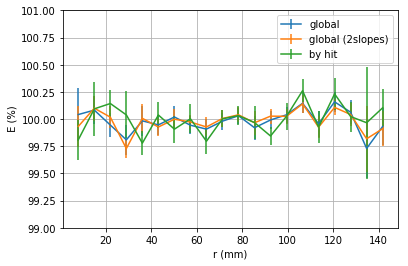

In [30]:
bins = 20
eclnor, ecdznor, eccnor = np.mean(sdf.ecln), np.mean(sdf.ecdz), np.mean(sdf.ecc)
ut.hprofile(sdf.r_ave, 100.*sdf.ecln/eclnor, nbins_profile = bins, label = 'global');
plt.xlabel('r (mm)'); plt.ylabel(' E (%)'); plt.grid();
ut.hprofile(sdf.r_ave, 100.*sdf.ecdz/ecdznor, nbins_profile = bins, label = 'global (2slopes)', fig = False);
plt.xlabel('r (mm)'); plt.ylabel(' E (%)'); plt.grid();
ut.hprofile(sdf.r_ave, 100.*sdf.ecc/eccnor, nbins_profile = bins, label = 'by hit', fig = False);
plt.xlabel('r (mm)'); plt.ylabel(' E (%)'); plt.grid(); plt.ylim(99., 101.); plt.legend();

## Compare in different samples

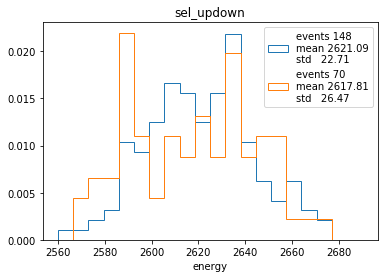

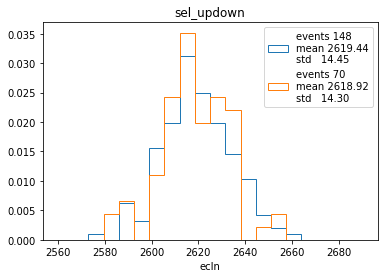

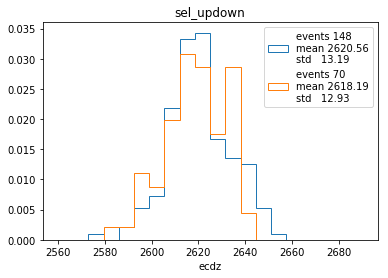

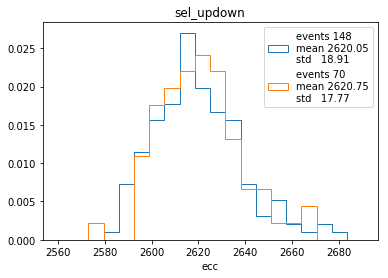

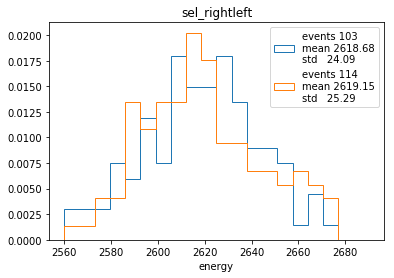

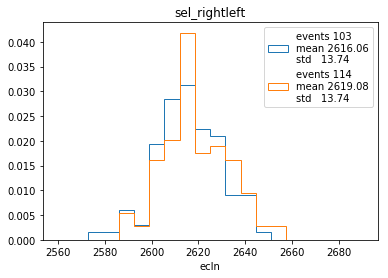

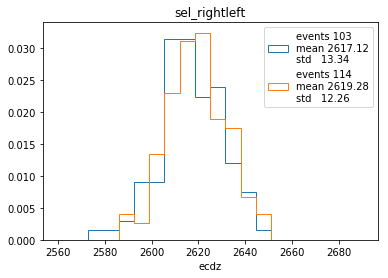

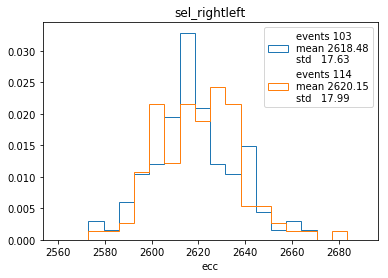

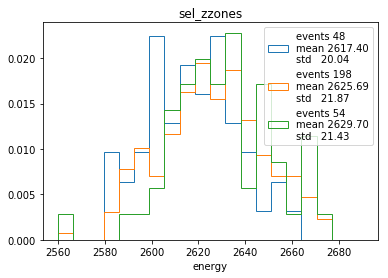

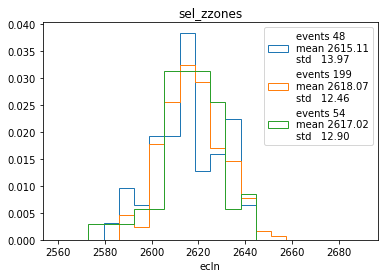

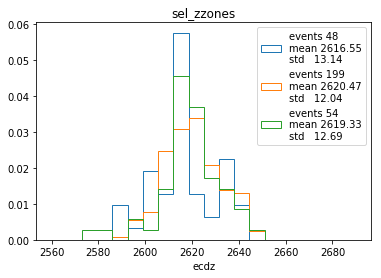

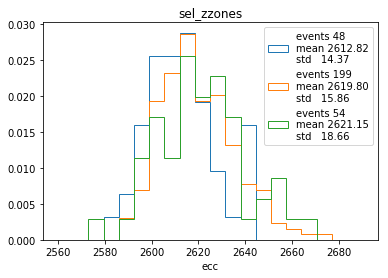

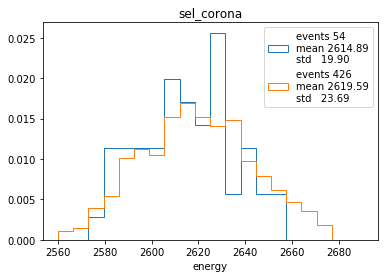

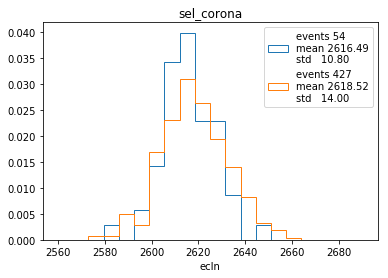

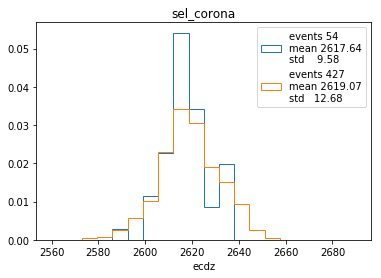

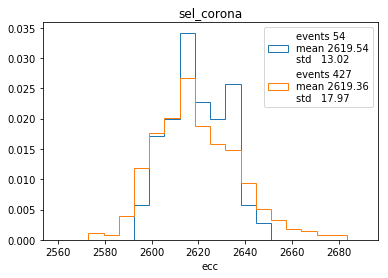

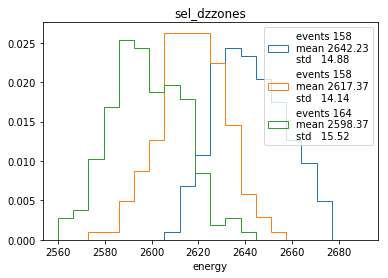

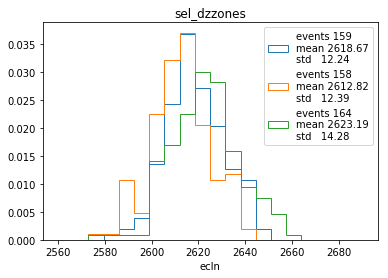

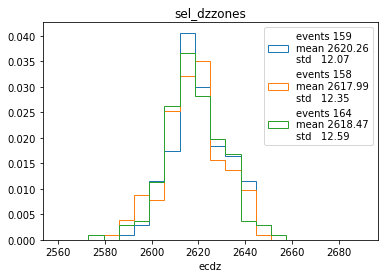

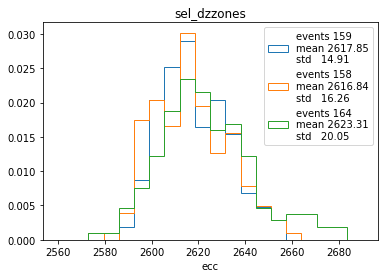

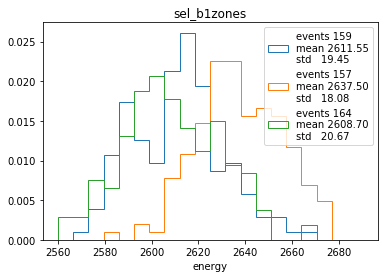

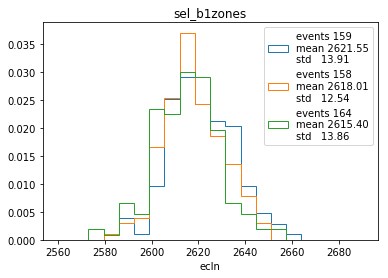

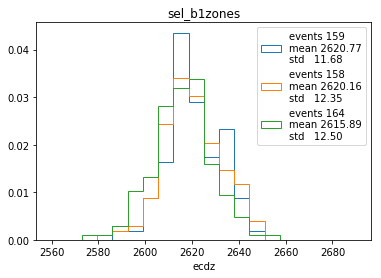

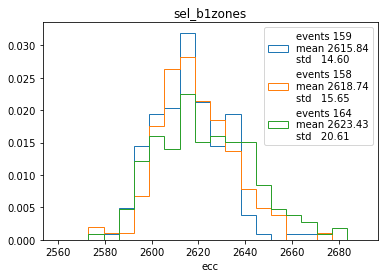

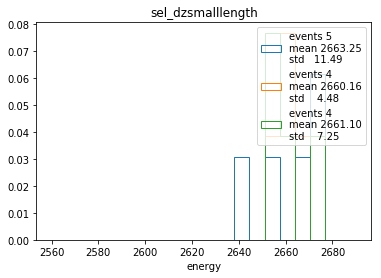

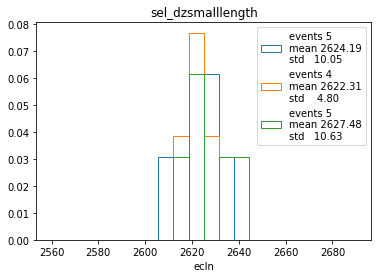

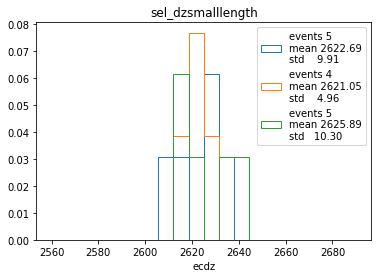

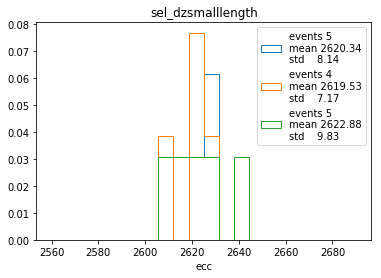

In [31]:
bins = 20
ilabels = ['energy', 'ecln', 'ecdz', 'ecc']
#erange  = (1620., 1680)
eblobrange = (0., 0.80)
samples = [ut.sel_updown, ut.sel_rightleft, ut.sel_zzones, 
           ut.sel_corona, ut.sel_dzzones, ut.sel_b1zones, ut.sel_dzsmalllength]
for sam in samples:
    ssam = str(sam).split()[1]
    sels = sam(sdf)
    ut.hist_sample(sdf, sels, ilabels, bins = bins, range = erange, title = ssam);

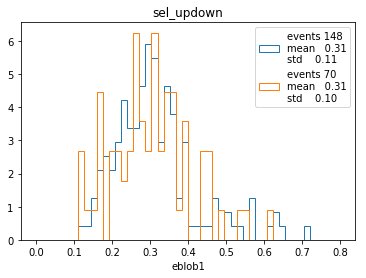

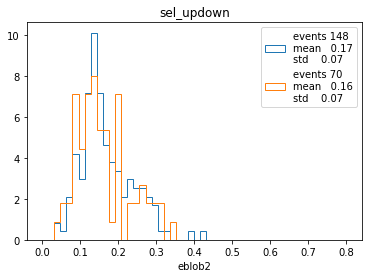

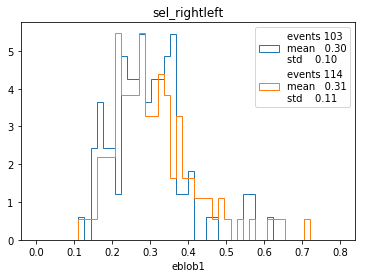

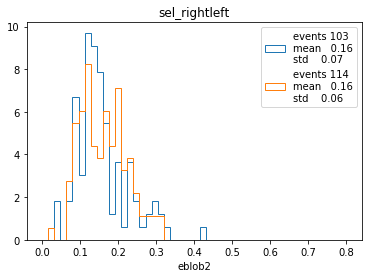

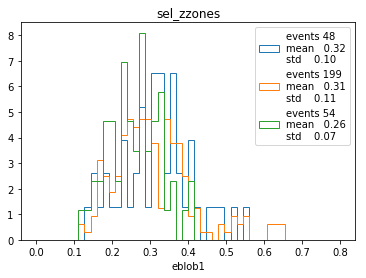

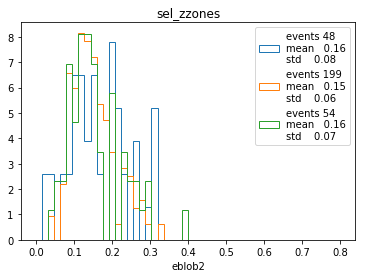

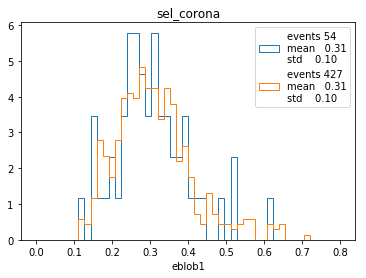

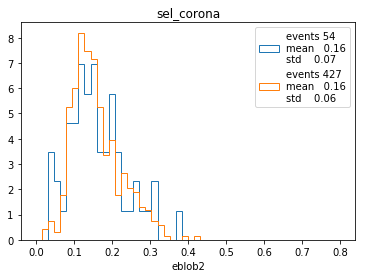

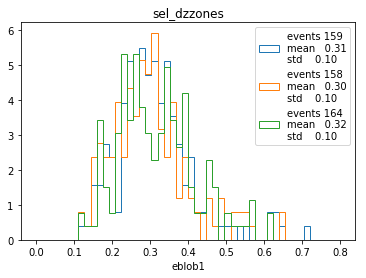

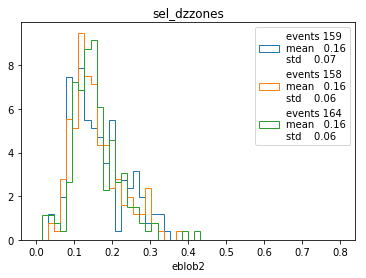

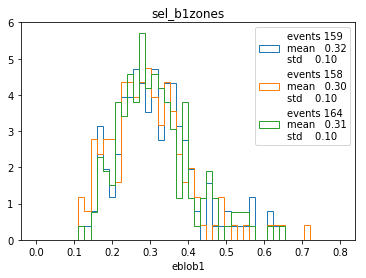

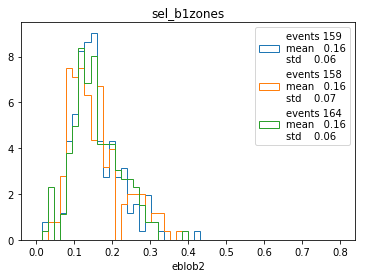

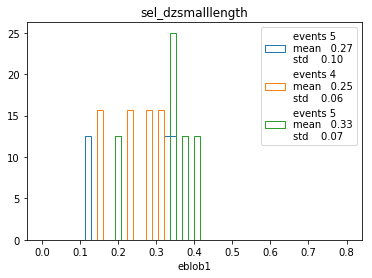

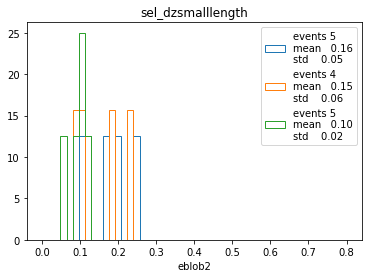

In [32]:
xlabels = ['eblob1', 'eblob2']
eblobrange = (0., 0.80)
for sam in samples:
    ssam = str(sam).split()[1]
    sels = sam(sdf)
    ut.hist_sample(sdf, sels, xlabels, bins = 50, range = eblobrange, title = ssam);

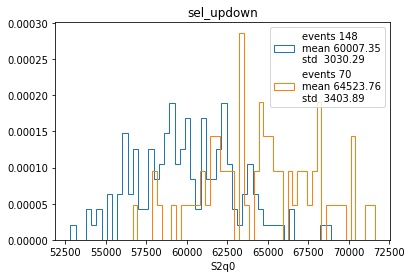

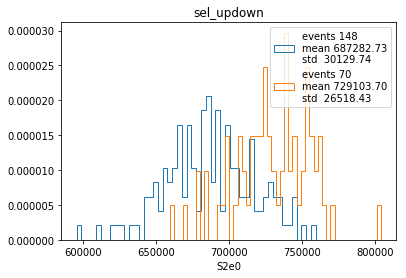

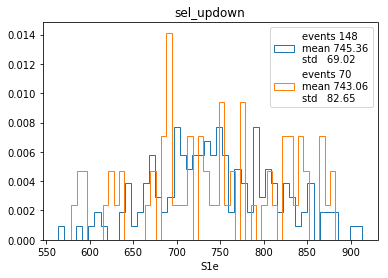

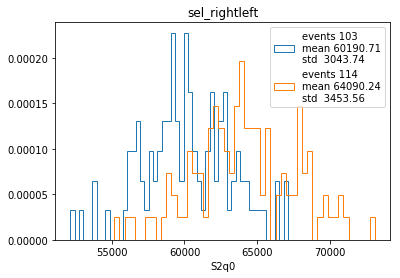

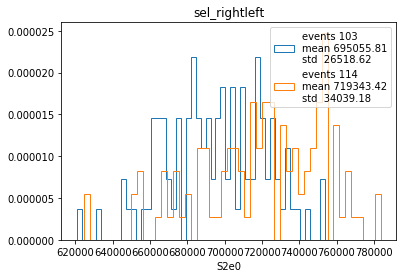

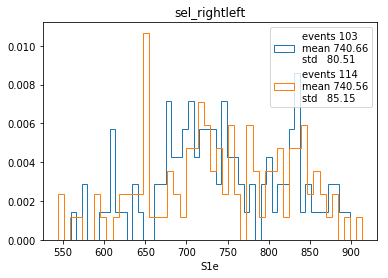

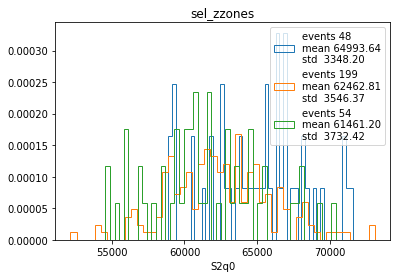

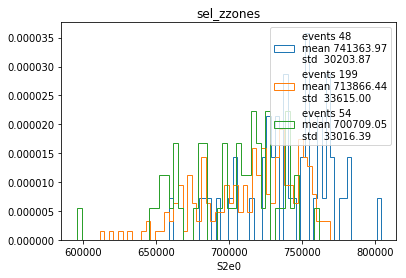

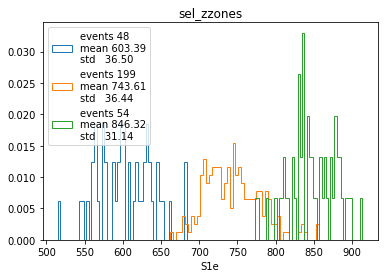

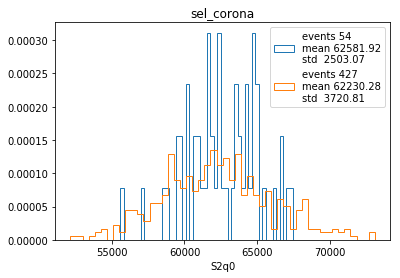

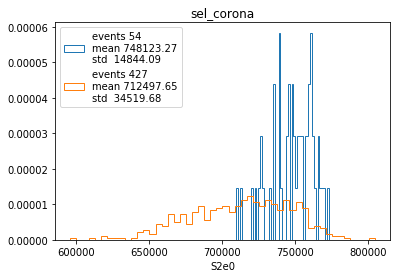

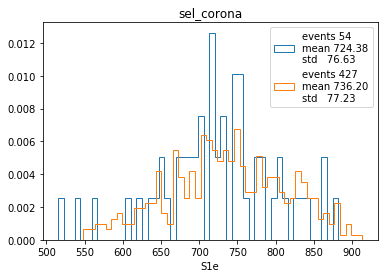

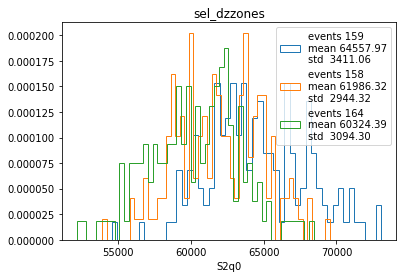

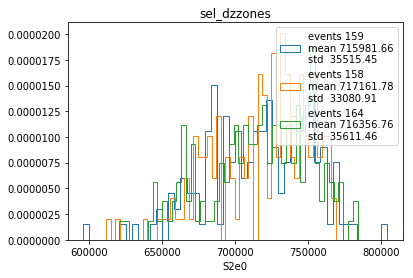

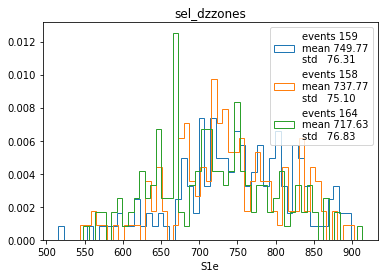

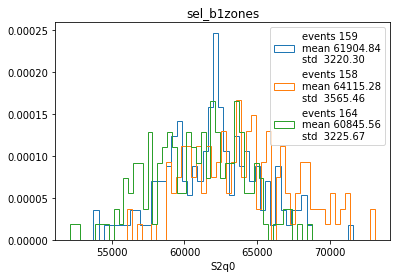

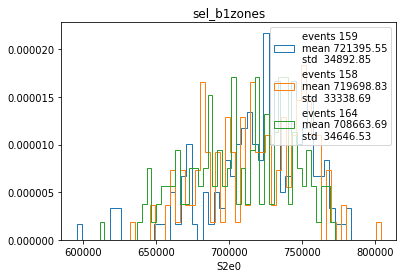

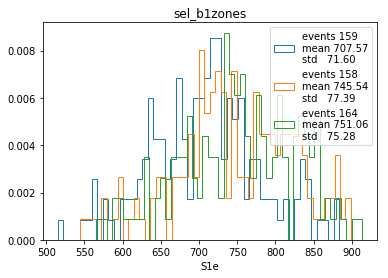

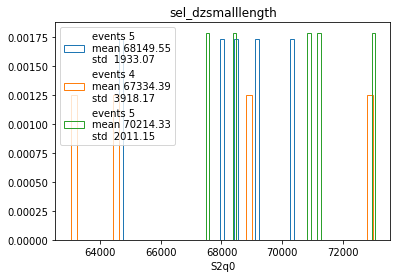

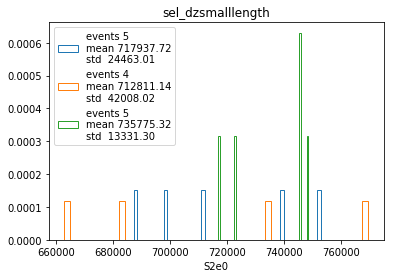

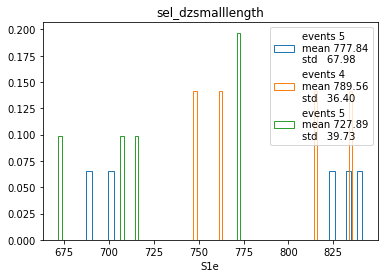

In [33]:
xlabels = ['S2q0', 'S2e0', 'S1e']
for sam in samples:
    ssam = str(sam).split()[1]
    sels = sam(sdf)
    ut.hist_sample(sdf, sels, xlabels, bins = 50, title = ssam);

## Position of the events

##### HERE

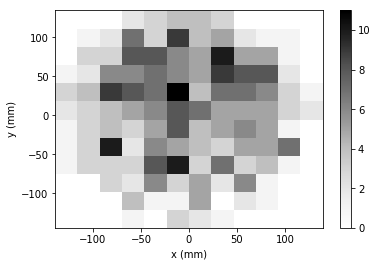

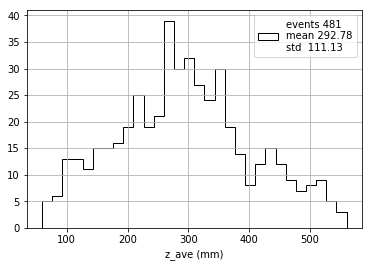

In [34]:
c = plt.hist2d(sdf.x_ave, sdf.y_ave, 12, cmap = 'Greys');
plt.xlabel('x (mm)'); plt.ylabel('y (mm)')
fig = plt.gcf()
plt.colorbar(c[-1]);
ut.hist(sdf.z_ave, 30, color = 'black');
plt.xlabel('z_ave (mm)'); plt.grid();

In [35]:
#inspect(dfptracks)

In [36]:
#inspect(dfpsumm)

In [37]:
#inspect(dfpevts)

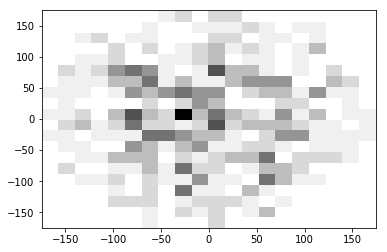

In [38]:
plt.hist2d(sdf.blob1_x, sdf.blob1_y, 20, cmap = 'Greys');

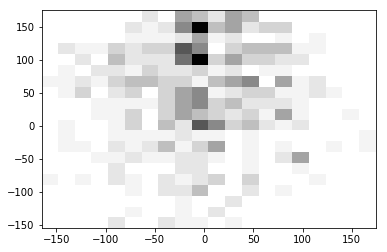

In [39]:
plt.hist2d(sdf.blob2_x, sdf.blob2_y, 20, cmap = 'Greys');

## Other studies